Final Dashboard for the Analyzed Report of Saels by all Catogries

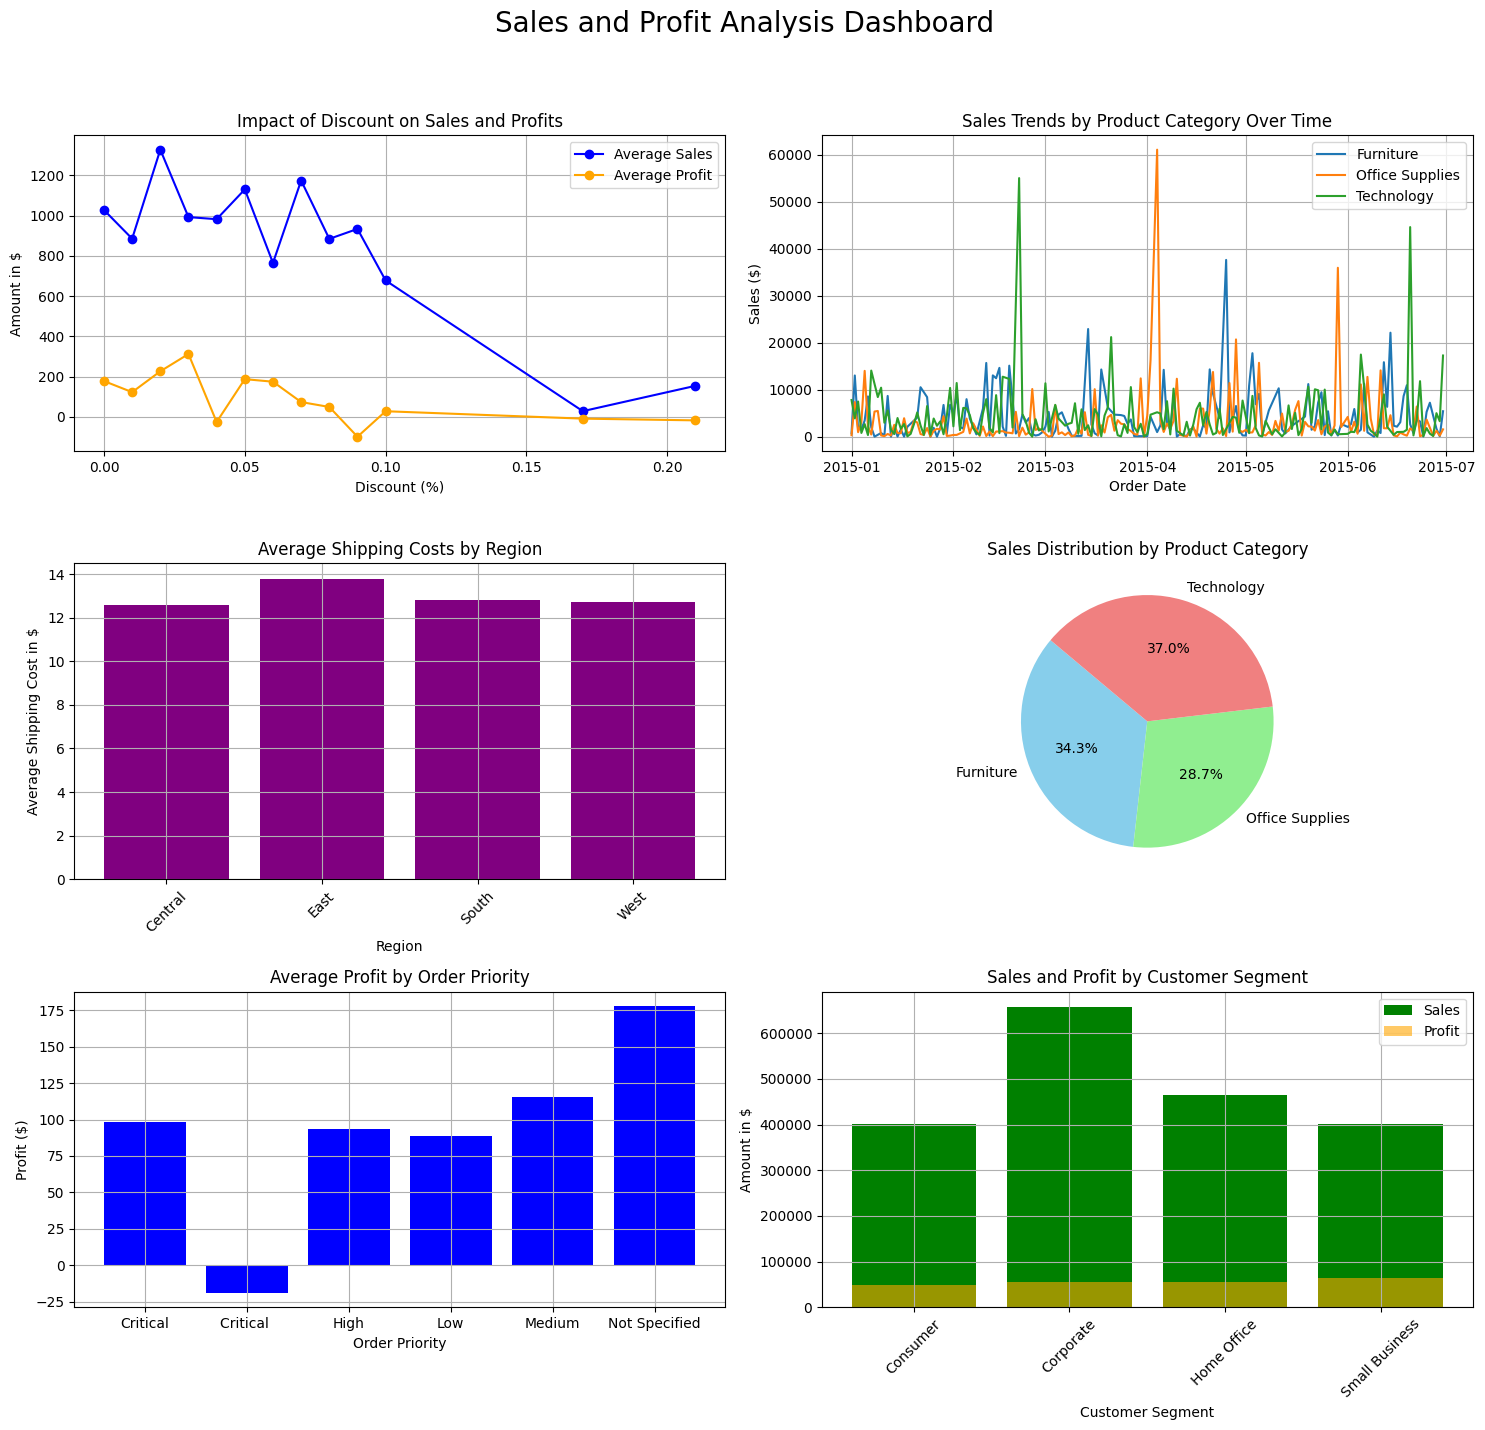

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('StoreUS-2015.csv')

# Convert date columns to datetime for time-based analysis
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

# Step 1: Calculate Profit Margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Step 2: Calculate Delivery Time (in days)
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Step 3: Analyze Discounts
discount_analysis = data.groupby('Discount').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Step 4: Product Category Analysis
category_sales_profit = data.groupby(['Product Category', 'Product Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sales Trends
sales_trends_by_category = data.groupby(['Order Date', 'Product Category']).agg({
    'Sales': 'sum'
}).reset_index()

# Step 5: Prepare the Dashboard
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Sales and Profit Analysis Dashboard', fontsize=20)

# 1. Discounts Analysis
axs[0, 0].plot(discount_analysis['Discount'], discount_analysis['Sales'], color='blue', marker='o', label='Average Sales')
axs[0, 0].plot(discount_analysis['Discount'], discount_analysis['Profit'], color='orange', marker='o', label='Average Profit')
axs[0, 0].set_title('Impact of Discount on Sales and Profits')
axs[0, 0].set_xlabel('Discount (%)')
axs[0, 0].set_ylabel('Amount in $')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Product Category Sales Trends Over Time
for category in sales_trends_by_category['Product Category'].unique():
    category_data = sales_trends_by_category[sales_trends_by_category['Product Category'] == category]
    axs[0, 1].plot(category_data['Order Date'], category_data['Sales'], label=category)

axs[0, 1].set_title('Sales Trends by Product Category Over Time')
axs[0, 1].set_xlabel('Order Date')
axs[0, 1].set_ylabel('Sales ($)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Shipping Costs by Region (if applicable)
shipping_cost_by_region = data.groupby('Region').agg({
    'Shipping Cost': 'mean'
}).reset_index()

axs[1, 0].bar(shipping_cost_by_region['Region'], shipping_cost_by_region['Shipping Cost'], color='purple')
axs[1, 0].set_title('Average Shipping Costs by Region')
axs[1, 0].set_xlabel('Region')
axs[1, 0].set_ylabel('Average Shipping Cost in $')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# 4. Pie Chart for Sales by Product Category
category_sales = data.groupby('Product Category').agg({
    'Sales': 'sum'
}).reset_index()

axs[1, 1].pie(category_sales['Sales'], labels=category_sales['Product Category'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
axs[1, 1].set_title('Sales Distribution by Product Category')

# 5. Order Priority vs Profit and Delivery Time
priority_analysis = data.groupby('Order Priority').agg({
    'Profit': 'mean',
    'Delivery Time': 'mean'  # Average delivery time in days
}).reset_index()

axs[2, 0].bar(priority_analysis['Order Priority'], priority_analysis['Profit'], color='blue', label='Profit')
axs[2, 0].set_title('Average Profit by Order Priority')
axs[2, 0].set_xlabel('Order Priority')
axs[2, 0].set_ylabel('Profit ($)')
axs[2, 0].grid(True)

# 6. Customer Segment Insights (if applicable)
customer_segment_analysis = data.groupby('Customer Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

axs[2, 1].bar(customer_segment_analysis['Customer Segment'], customer_segment_analysis['Sales'], color='green', label='Sales')
axs[2, 1].bar(customer_segment_analysis['Customer Segment'], customer_segment_analysis['Profit'], color='orange', label='Profit', alpha=0.6)
axs[2, 1].set_title('Sales and Profit by Customer Segment')
axs[2, 1].set_xlabel('Customer Segment')
axs[2, 1].set_ylabel('Amount in $')
axs[2, 1].tick_params(axis='x', rotation=45)
axs[2, 1].grid(True)
axs[2, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
